# Simple Linear Regression

In [73]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error, mean_absolute_error, mean_squared_error

In [4]:
#Loading the dataset
dfwh=pd.read_csv("weight-height.csv")

In [5]:
dfwh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
dfwh.shape

(10000, 3)

In [7]:
dfwh.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

### Feature Selection

In [8]:
#In this step we will drop the unnecessary/irrelevant columns for data cleaning
dfwh.drop("Gender",axis=1)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [9]:
#make it as a permanent change
dfwh.drop("Gender",axis=1,inplace=True)

In [10]:
dfwh

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


### NANs

In [11]:
#Treating the null values
dfwh.isna().sum()

Height    0
Weight    0
dtype: int64

In [12]:
#since there are no null values present we can go ahead to the next step

### Error Detection

In [13]:
#let's find the errors and treat them

<Axes: >

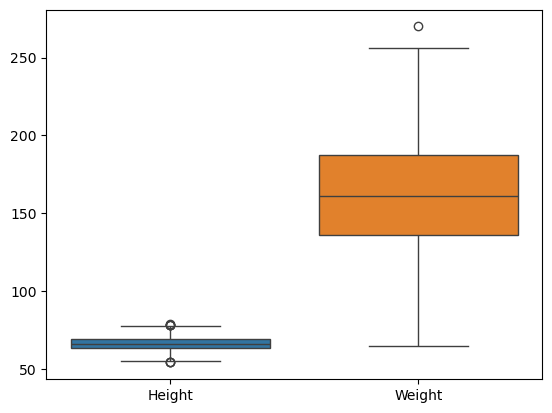

In [14]:
sns.boxplot(dfwh)

In [15]:
#we can see that there are outliers

<Axes: ylabel='Height'>

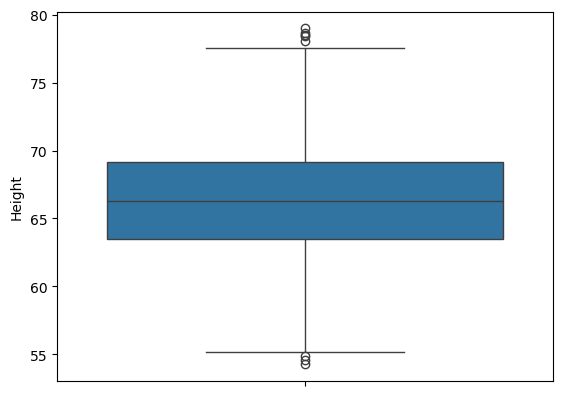

In [16]:
sns.boxplot(dfwh["Height"])

<Axes: ylabel='Weight'>

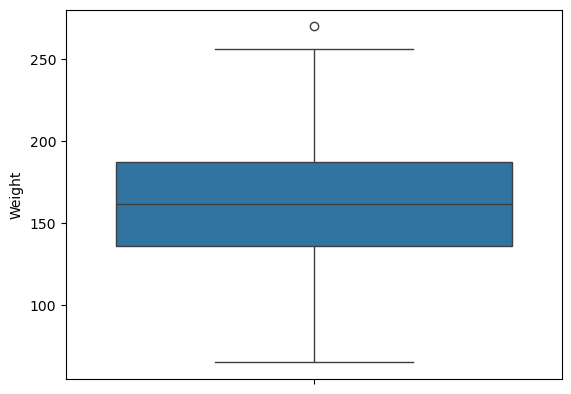

In [17]:
sns.boxplot(dfwh["Weight"])

In [18]:
#identifying the errors in height column

In [19]:
#quartile1
q1 = dfwh["Height"].quantile(0.25)

In [20]:
q1

np.float64(63.505620481218955)

In [21]:
#quartile3
q3 = dfwh["Height"].quantile(0.75)

In [22]:
q3

np.float64(69.1742617268347)

In [23]:
#interpret the data
dfwh["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [24]:
#Interquartile Range
iqr = q3-q1

In [25]:
iqr

np.float64(5.668641245615746)

In [26]:
#lower_limit
lower = q1-(1.5*iqr)

In [27]:
lower

np.float64(55.00265861279534)

In [28]:
#upper_limit
upper = q3+(1.5*iqr)

In [29]:
upper

np.float64(77.67722359525831)

In [30]:
dfwh[(dfwh["Height"]<lower) | (dfwh["Height"]>upper)]

,Height,Weight
994,78.095867,255.690835
1317,78.462053,227.342565
2014,78.998742,269.989699
3285,78.528210,253.889004
3757,78.621374,245.733783
6624,54.616858,71.393749
7294,54.873728,78.606670
9285,54.263133,64.700127


In [31]:
#capping (Replacing outliers with a maximum or minimum valid value
dfwh["Height"]=dfwh["Height"].map(lambda x:lower if x<lower else upper if x>upper else x)

In [32]:
#checking whether the otliers are treated or not
dfwh[(dfwh["Height"]<lower) | (dfwh["Height"]>upper)]

,Height,Weight


<Axes: ylabel='Height'>

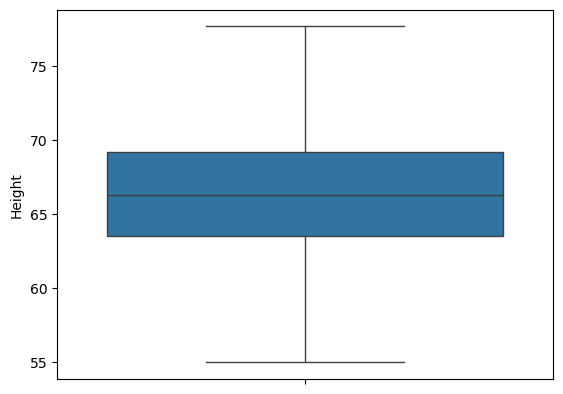

In [33]:
sns.boxplot(dfwh["Height"])

<Axes: ylabel='Weight'>

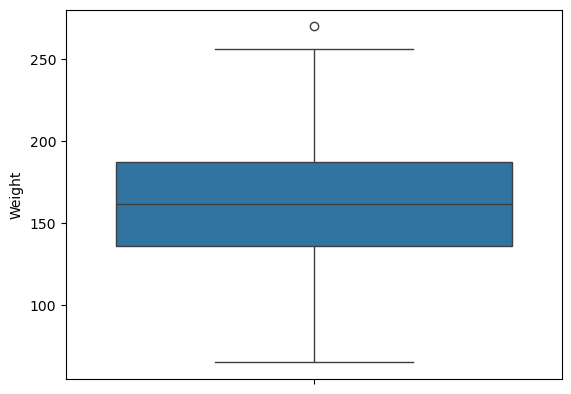

In [34]:
#now let's treat the outliers in weight column too.
sns.boxplot(dfwh["Weight"])

In [35]:
#quartile1
qw1 = (dfwh["Weight"].quantile(0.25)).round()

In [36]:
qw1

np.float64(136.0)

In [37]:
#quartile3
qw3 = (dfwh["Weight"].quantile(0.75)).round()

In [38]:
qw3

np.float64(187.0)

In [39]:
dfwh["Weight"].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [40]:
#Interquartile Range
iqrw = qw3-qw1

In [41]:
iqrw

np.float64(51.0)

In [42]:
lowerw=qw1-(1.5*iqrw)

In [43]:
lowerw

np.float64(59.5)

In [44]:
upperw=qw3+(1.5*iqrw)

In [45]:
upperw

np.float64(263.5)

In [46]:
dfwh[(dfwh["Weight"]<lowerw) | (dfwh["Weight"]>upperw)]

,Height,Weight
2014,77.677224,269.989699


In [47]:
#as there is only one outlier and it is in dependent column we will drop it
dfwh.drop(2014,inplace=True)

In [48]:
dfwh[(dfwh["Weight"]<lowerw) | (dfwh["Weight"]>upperw)]

,Height,Weight


<Axes: ylabel='Weight'>

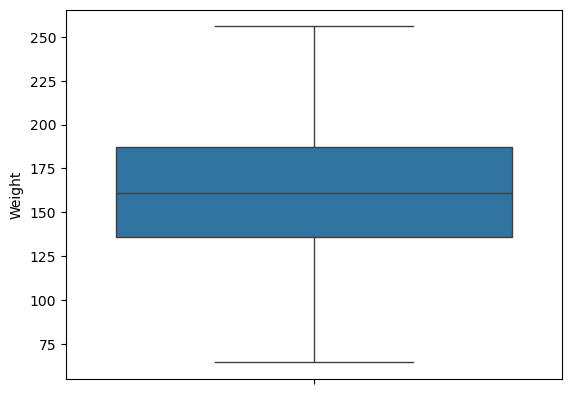

In [49]:
sns.boxplot(dfwh["Weight"])

### Data Seperation

In [50]:
#seperate the data into independent and dependent columns

In [51]:
#independent columns
X = dfwh[["Height"]]

In [52]:
X

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [53]:
#dependent column
y = dfwh["Weight"]

In [54]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 9999, dtype: float64

### Data Splitting

In [55]:
#splitting training and testing data

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=187)

In [91]:
X_train.shape

(7999, 1)

In [92]:
y_train.shape

(7999,)

In [93]:
X_test.shape

(2000, 1)

In [94]:
y_test.shape

(2000,)

### Model Building

In [95]:
lr_model = LinearRegression()

In [101]:
lr_model

LinearRegression()

### Model Training

In [109]:
lr_model.fit(X_train,y_train)

LinearRegression()

### Model Testing

In [110]:
lr_model.score(X_test,y_test)

0.870529204718899

### Auto Random State

In [107]:
scores_list=[]
for i in range(500):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr_model1=LinearRegression()
    lr_model1.fit(X_train,y_train)
    score = lr_model1.score(X_test,y_test)
    scores_list.append(score)
m = max(scores_list)
i = scores_list.index(m)
print("Random State :",i)
print("maximum score :",m)

Random State : 187
maximum score : 0.870529204718899


### New Parameters

In [126]:
#slope
lr_model.coef_

array([7.7115942])

In [127]:
lr_model.intercept_

np.float64(-350.29432465163757)

In [128]:
#predicted values of y
y_pred = lr_model.predict(X_test)

In [129]:
y_pred

array([215.65637994, 247.08870864, 204.24815714, ..., 135.44368498,
       170.32587232, 167.93994257])

### R Square

In [130]:
r2 = r2_score(y_test,y_pred)
r2

0.870529204718899

### Adjusted R square

In [131]:
#number of rows/data points in test data
n=len(y_test)
n

2000

In [132]:
#number of independent features
p=X_test.shape[1]
p

1

In [133]:
#adjusted r square
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
adj_r2

0.8704644045210607

### Mean squared Error

In [135]:
mse = mean_squared_error(y_test,y_pred)
mse

138.56313435730135

In [136]:
### Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(11.771284312142893)

### Mean Absolute Error

In [138]:
mae = mean_absolute_error(y_test,y_pred)
mae

9.461355797708945